<a href="https://colab.research.google.com/github/rymarinelli/Python/blob/master/Tidy_Tuesday_12_12.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import re

In [3]:
holiday_episodes = pd.read_csv("https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2023/2023-12-19/holiday_episodes.csv")
holiday_episode_genres = pd.read_csv('https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2023/2023-12-19/holiday_episode_genres.csv')

In [8]:
run_time = holiday_episodes[["runtime_minutes", "genres" , "parent_average_rating"]]
run_time['runtime_minutes'] = run_time['runtime_minutes'].fillna(run_time['runtime_minutes'].median())
run_time['genres'] = run_time['genres'].fillna(run_time['genres'].mode()[0])

<ipython-input-8-f8ca180b7144>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  run_time['runtime_minutes'] = run_time['runtime_minutes'].fillna(run_time['runtime_minutes'].median())
<ipython-input-8-f8ca180b7144>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  run_time['genres'] = run_time['genres'].fillna(run_time['genres'].mode()[0])


In [18]:

pattern = r'\w+'

run_time['genres'] = pd.Series([re.findall(pattern, item)[0] if re.findall(pattern, item) else None for item in run_time['genres']])



<ipython-input-18-8784df385578>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  run_time['genres'] = pd.Series([re.findall(pattern, item)[0] if re.findall(pattern, item) else None for item in run_time['genres']])


<Figure size 1000x600 with 0 Axes>

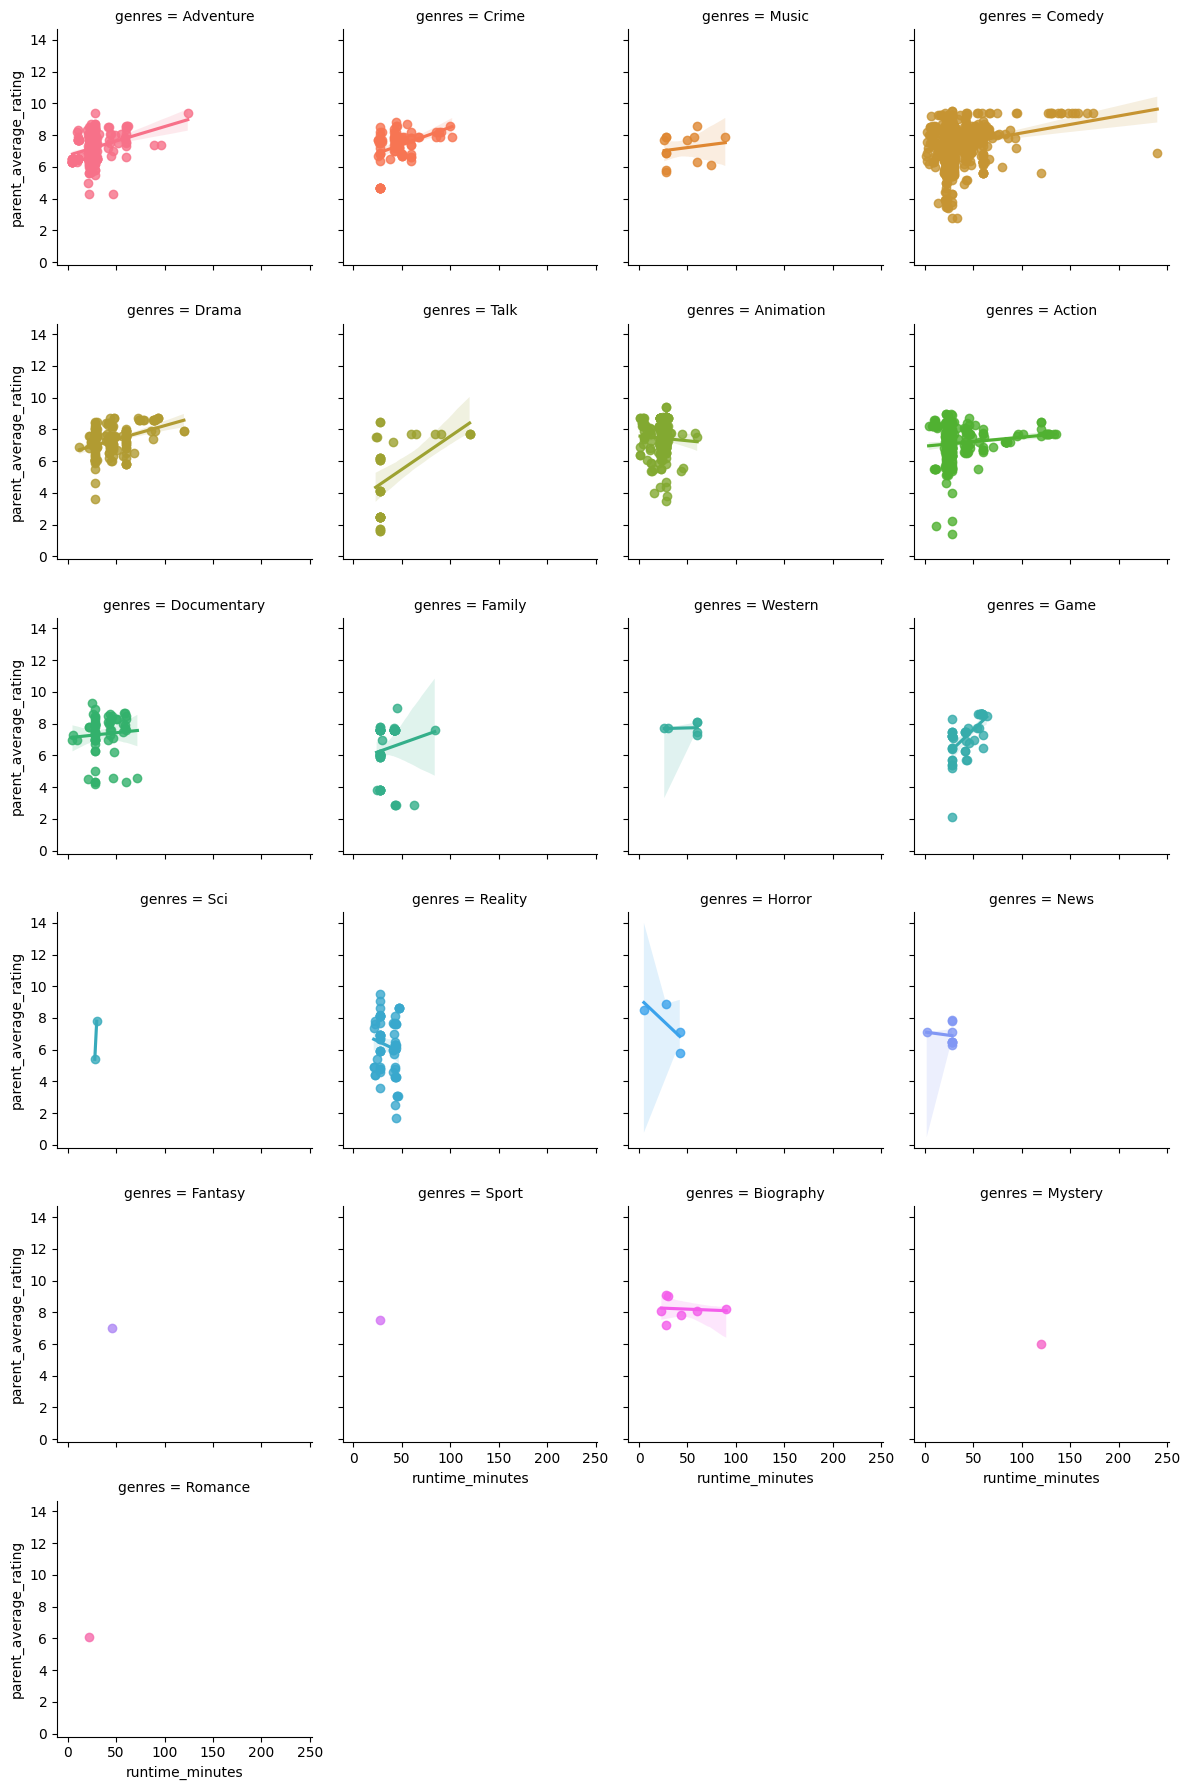

In [28]:
# Adjust the size of the plot as needed
plt.figure(figsize=(10, 6))

sns.lmplot(x='runtime_minutes',
           y='parent_average_rating',
           data=run_time,
           hue='genres',
           col='genres',
           col_wrap=4,
           height=3,
           aspect=1)

# Show the plot
plt.show()
